In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data1 = [1,2,3]
data2 = [[1,2,3],[4,5,6]]

In [5]:
arr1 = np.array(data1)
arr2 = np.array(data2)

## 4.1.1 ndarrayの生成
### ndim 
return 配列の次元数

### shape
return 配列の次元ごとの要素数を格納するタプル

### dtype
return 要素の型

### ndarray生成関数
### array
省略

### asarray
arrayと同様だが、入力がndarrayだった場合は新規に変数を生成しない.

### zeros, zeros_like
指定されたサイズのndarrayを生成し、すべての要素に0を設定する　

### ones, ones_like
指定されたサイズのndarrayを生成し、すべての要素に1を設定する

### empty, empty_like
onesと同様にndarrayを生成するが, 各要素は初期化されず不定のまま.
=> 配列の領域のみをメモリ上に確保するだけ、値は不明になる.
=> 実行速度が高速なため、明示的な初期化が必要ない場面に使う.

### arange
range関数と同等の動作で、等間隔に増減させた値で要素を満たす

### full, full_like
指定されたサイズのndarrayを指定されたdtypeで生成, 要素を全て指定された値で埋める.

### eye, identity
N x Nの単位行列となるndarrayを生成する.

In [22]:
print(np.empty(3))
print(np.empty(3, dtype= np.bool)) #bool値にもできる
print(np.empty(4, dtype= complex)) #複素数にもできる

[2.68156159e+154 2.68156159e+154 1.48219694e-323]
[ True  True  True]
[-2.68156159e+154-2.68156159e+154j  2.47032823e-323+0.00000000e+000j
  0.00000000e+000+0.00000000e+000j -2.68156159e+154-2.68156159e+154j]


## 4.1.2 ndarrayのデータ型
dtypeはndarrayの$データ型$. 以下リスト

|型|型コード|説明|
|:----|:----|:----|
|int8/16/32/64|i1/i2/i4/i8| |
|float16/32/64/128| f2/f/d/g| |
|complex64/128/256 | c8/c16/c32 |複素数型 |
|bool|?||
|object|O|Pythonのオブジェクト型|
|string_|S||
|unicode_|U||

### astype
dtypeを明示的に型変換する
(必ず新規ndarrayが生成されることに注意)

In [32]:
arr = np.array([0,1,2,3,4,5])
print(arr.dtype, arr)
arr = arr.astype(np.float64)
print(arr.dtype, arr)
arr = arr.astype(np.complex64)
print(arr.dtype, arr)
arr = arr.astype(np.bool)
print(arr.dtype, arr)

int64 [0 1 2 3 4 5]
float64 [0. 1. 2. 3. 4. 5.]
complex64 [0.+0.j 1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j]
bool [False  True  True  True  True  True]


## 4.1.3 ndarrayの算術演算
ndarray間を比較した時、その結果は同要素数の真偽値配列として戻される.
サイズの異なるndarray同士の演算は**ブロードキャスト**と呼ばれる

In [48]:
arr1 = np.array([1,2,3,4])
arr2 = np.array([2,1,4,3])

arr1 < arr2

array([ True, False,  True, False])

## 4.1.4 インデックス参照とスライシングの基礎
### 一次次元の場合

In [49]:
arr = np.arange(10)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [50]:
arr[4]

4

In [51]:
arr[4:8]

array([4, 5, 6, 7])

In [53]:
arr[4:8] = 12
print(arr)

[ 0  1  2  3 12 12 12 12  8  9]


リストと異なり, ndarrayのスライシングは切り出された元のndarrayの**ビュー**であり、値の変更はオリジナルに反映される.(**ブロードキャスト**)

In [57]:
arr_slice = arr[8:10]
print(arr_slice)

[8 9]


In [58]:
arr_slice[1] = 114
print(arr, arr_slice)

[  0   1   2   3  12  12  12  12   8 114] [  8 114]


ビューではなくコピーにしたい場合は明示的にcopy()をつける

In [61]:
arr_slice_copy = arr[0:6].copy() 
print(arr_slice_copy)

[ 0  1  2  3 12 12]


In [65]:
arr_slice_copy[:] = 0
print(arr, arr_slice_copy)

[  0   1   2   3  12  12  12  12   8 114] [0 0 0 0 0 0]


### N次元の場合
インデックス参照の手段が増える.

N = 2の場合, arr2d[0][1] または arr2d[0,1]で参照できる

## ブールインデックス参照
参照されたndarrayはコピーされたものであることに注意

In [66]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)

In [67]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [68]:
data

array([[-0.26137137, -0.27578319,  0.58236428, -0.63574719],
       [ 0.66365135,  0.56309523,  0.15481779,  0.05725008],
       [ 0.24389413,  1.51016652,  1.12187462,  0.09847997],
       [-0.66903941, -0.76626678, -0.40104834,  1.45914701],
       [-1.96764149, -0.16878813,  0.68619478, -1.04238164],
       [ 0.15220784,  1.5688388 , -0.56420524, -0.88325396],
       [-0.21069243, -0.84428861,  1.00826331,  0.08022791]])

dataから'Bob'に対応する行を抜き出す

In [69]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [70]:
data[ names == 'Bob' ]

array([[-0.26137137, -0.27578319,  0.58236428, -0.63574719],
       [-0.66903941, -0.76626678, -0.40104834,  1.45914701]])

列のスライスも同時に指定

In [71]:
data[names == 'Bob', 2:]

array([[ 0.58236428, -0.63574719],
       [-0.40104834,  1.45914701]])

In [72]:
data[names == 'Bob',3]

array([-0.63574719,  1.45914701])

In [73]:
data[data < 0]

array([-0.26137137, -0.27578319, -0.63574719, -0.66903941, -0.76626678,
       -0.40104834, -1.96764149, -0.16878813, -1.04238164, -0.56420524,
       -0.88325396, -0.21069243, -0.84428861])

In [75]:
data[data < 0 ] = 0
print(data)

[[0.         0.         0.58236428 0.        ]
 [0.66365135 0.56309523 0.15481779 0.05725008]
 [0.24389413 1.51016652 1.12187462 0.09847997]
 [0.         0.         0.         1.45914701]
 [0.         0.         0.68619478 0.        ]
 [0.15220784 1.5688388  0.         0.        ]
 [0.         0.         1.00826331 0.08022791]]


## 4.1.6 ファンシーインデックス参照
インデックス参照に整数配列を用いる方法のこと

arr からある特定の順序で行を抽出するには、その順番を示す**整数のリスト**あるいは**ndarray**をインデックス参照として渡す.

この参照の場合は必ず**一次元配列として返される**

In [77]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
print(arr)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


In [78]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [79]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [81]:
arr = np.arange(32).reshape((8,4))
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [82]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

In [83]:
arr[[1,5,2,7]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [ 8, 11,  9, 10],
       [28, 31, 29, 30]])

## 4.1.7 転置行列
ndarrayの転置は、オリジナル行列を再構成した特別なビューを戻す.コピーは生成しない.

方法
1. transpose関数
2. Tを参照
3. swapaxes関数

a.swapaxes(axis1, axis2)

Return a view of the array with `axis1` and `axis2` interchanged.

In [85]:
arr = np.arange(15).reshape((3,5))
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [86]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [87]:
arr = np.random.randn(6,3)
print(arr)

[[-0.36643434 -1.01681266 -0.71117774]
 [-2.01407877  0.68183995 -0.05359618]
 [-0.02202998 -1.90519697 -0.29148443]
 [-0.3080216  -0.4280681   0.15453725]
 [ 1.06834786 -0.33393087  1.30559478]
 [ 0.24735576 -1.27556379  1.0120655 ]]


In [88]:
np.dot(arr.T, arr)

array([[ 5.48870206, -1.49913101,  1.97253708],
       [-1.49913101,  7.05040432, -0.5511592 ],
       [ 1.97253708, -0.5511592 ,  3.34634556]])

高次元の場合,transposeの引数に軸の順序を与えることで入れ替えが可能.

In [91]:
arr = np.arange(16).reshape((2,2,4))
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


2番目の軸が先頭、1番目の軸が2番目, 三番目の軸はそのまま

In [93]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [96]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2 ユニバーサル関数
ndarrayを対象に, 要素ごとの操作結果を戻す関数.

- 単項ufunc

|Function|Description|
|:--|:--|
|abs, fabs|絶対値計算, fabsは整数と小数のみ(高速)|
| sqrt | 平方根 |
| square | 二乗 |
| exp | 指数 |
| log, log10, log2, log1p| 1pは各要素に1を加えた数を真数として底eの対数計算 |
| sign | 各要素の符号を返す 正=>1, 0 => 0, 負=>-1 |
| ceil | 切り上げ |
| floor | 切り下げ |
| rint | 各要素の丸め値 |
| modf | 整数部分と小数部分に分割, 2つの配列を返す |
| isnan | NaNの真偽値配列 |
| isfinite, isinf | isfiniteは有限かどうか, isinfは無限かどうか |
| 三角関数及び逆散策関数|　|
| logiical_not | ~arrと同等 |
    
- 二項ufunc

|Function|Description|
|:--|:--|
| add/subtract/multiply/divide | 省略 |
| floor_divide | あまりを切り捨て |
| power | arr1を底, arr2要素でべき乗 |
| maximum/fmax | 配列の要素ごとの最大値を計算 maximumはNaNを選ぶ|
| minimum/fmin | |
| mod | 余剰計算 |
| copysign | arr1の値に,arr2の配列要素の符号をつける |

In [102]:
arr = np.arange(10)
print(np.sqrt(arr))
print(np.exp(arr))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [106]:
arr1 = np.arange(10).reshape((2,5))
arr2 = arr1
np.power(arr1 ,arr2)

array([[        1,         1,         4,        27,       256],
       [     3125,     46656,    823543,  16777216, 387420489]])

# ndarrayによる配列指向プログラミング
関数`sqrt(x^2 + y^2)`の取る値を図示する

- meshgrid関数 : 2つの１次元配列を取り、それぞれの要素のすべての組み合わせを列挙する.

In [107]:
points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points, points)

In [108]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [113]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

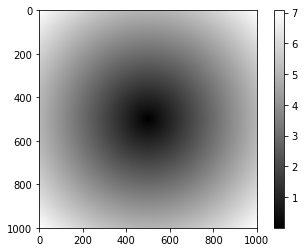

In [116]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

## 4.3.1 条件制御のndarray
`numpy.where` で三項演算子を使用できる

`where(condition, arr1, arr2)`
conditionがTrueのときarr1

In [118]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [121]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
print(result)

[1.1, 2.2, 1.3, 1.4, 2.5]


In [123]:
result = np.where(cond, xarr, yarr)
print(result)

[1.1 2.2 1.3 1.4 2.5]


In [126]:
arr = np.random.randn(4,4)
print(arr)

np.where(arr > 0, 2, -2)

[[ 0.1980626   1.7730123  -2.23537645  0.53795526]
 [ 0.36917791 -0.34584639 -1.12075853  0.63415748]
 [ 0.03271941  0.04997995  0.30481088  0.06236752]
 [ 0.638945    1.48684436  0.82869448  0.45485781]]


array([[ 2,  2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2,  2,  2,  2],
       [ 2,  2,  2,  2]])

In [130]:
np.where(arr> 0, 2, arr)

array([[ 2.        ,  2.        , -2.23537645,  2.        ],
       [ 2.        , -0.34584639, -1.12075853,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

## 4.3.2 数学関数, 統計関数
- mean
    - np.mean(arr)
    - arr.mean()
- sum
- cumsum : 累積和
- cumprod : 累積積
- std, var
- min, max
- argmin, argmax

In [131]:
arr = np.random.randn(5,4)

In [132]:
arr

array([[ 1.32030736, -1.04781542,  0.99928046, -0.62826873],
       [-0.38663149,  0.94359963, -0.15183966,  0.19876312],
       [-0.70345624, -3.18812206,  1.01596838, -0.00683191],
       [ 1.49352944,  0.08911139,  0.24766447, -0.22130452],
       [ 0.5376884 ,  0.2256541 ,  1.39558666, -0.33758904]])

In [139]:
print(arr.mean())
print(np.mean(arr))
print(arr.mean(axis = 1))
print(arr.mean(1))


0.08976471700492769
0.08976471700492769
[ 0.16087592  0.1509729  -0.72061046  0.40225019  0.45533503]
[ 0.16087592  0.1509729  -0.72061046  0.40225019  0.45533503]


In [142]:
print(arr.sum())
print(np.sum(arr))
print(arr.sum(axis=1))
print(arr.sum(1))

1.795294340098554
1.795294340098554
[ 0.64350367  0.6038916  -2.88244183  1.60900078  1.82134012]
[ 0.64350367  0.6038916  -2.88244183  1.60900078  1.82134012]


In [149]:
arr2 = np.arange(1,8)
print(arr2)
print(arr2.cumsum())
print(arr2.cumprod())

[1 2 3 4 5 6 7]
[ 1  3  6 10 15 21 28]
[   1    2    6   24  120  720 5040]


## 4.3.3 真偽値配列関数
sumを用いて真偽値配列中のTruwの数を数えられる.

- any : 一つでもTrueがあるかどうか
- all : 全てがTrueかどうか

In [150]:
bools = np.array([False, True, False, False])
print(bools.any())
print(bools.all())

True
False


## 4.3.4 ソート

In [156]:
arr = np.random.randn(6)
arr

array([ 0.49374697, -1.00174431,  0.90020577, -1.001182  ,  0.33289737,
       -1.54469615])

In [157]:
arr.sort()
arr

array([-1.54469615, -1.00174431, -1.001182  ,  0.33289737,  0.49374697,
        0.90020577])

In [158]:
arr = np.random.randn(5,5)
arr

array([[-0.71581976, -0.91485274,  0.67362867, -0.45397188,  0.1581042 ],
       [-2.29410531,  1.07340807,  0.22064991,  1.62665158, -0.3119703 ],
       [ 0.06520115,  0.02900563, -1.28787243, -0.53316918,  0.60406057],
       [-0.42531457, -0.10624051, -0.72202027, -0.31787743, -0.32704082],
       [-1.3889256 ,  1.92326698,  0.87141736,  0.36074321, -0.75852841]])

In [160]:
arr.sort(1)
arr

array([[-0.91485274, -0.71581976, -0.45397188,  0.1581042 ,  0.67362867],
       [-2.29410531, -0.3119703 ,  0.22064991,  1.07340807,  1.62665158],
       [-1.28787243, -0.53316918,  0.02900563,  0.06520115,  0.60406057],
       [-0.72202027, -0.42531457, -0.32704082, -0.31787743, -0.10624051],
       [-1.3889256 , -0.75852841,  0.36074321,  0.87141736,  1.92326698]])

５パーセンタイル分位点を求める.

In [167]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [168]:
large_arr[int(0.05 * len(large_arr))]

-1.5478161164115665

## 4.3.5 集合関数
|Function|Description|
|:--|:--|
|unique(x)|配列xに対し、**重複除外**してソート|
|intersect1d(x ,y)| xとyのうち、共通する要素を取り出しソート |
| union1d(x, y) | xとyのうち、少なくとも一方に存在する要素を取りだしソート |
| in1d(x, y) | xにyの要素群が含まれているか判別 |
| setdiff1d(x,  y) | xからyに存在する要素を取り除きソート |
| setxor1d(x, y) | xとyのうち、どちらか一方にのみ存在する要素を取り出しソート |

In [181]:
xarr = np.random.randint(20, size=20)
yarr = np.random.randint(20, size=20)
print(xarr, yarr)

[13  8  4 13  4 18 13  7 14  6 13  5 14  7  1  7  0  2  5  3] [ 0  3  9 14 11 19  9 12 18 16 18  5 11 18  2 10 11  6 17  5]


In [188]:
xarr.sort()
yarr.sort()
print(xarr, yarr)

[ 0  1  2  3  4  4  5  5  6  7  7  7  8 13 13 13 13 14 14 18] [ 0  2  3  5  5  6  9  9 10 11 11 11 12 14 16 17 18 18 18 19]


In [196]:
print("unique : ",np.unique(xarr))
print('intersect1d : ', np.intersect1d(xarr, yarr))
print('union1d : ', np.union1d(xarr, yarr))
print('in1d : ', np.in1d(xarr, yarr))
print('setdiff1d : ', np.setdiff1d(xarr, yarr))
print('setxor1d : ', np.setxor1d(xarr, yarr))

unique :  [ 0  1  2  3  4  5  6  7  8 13 14 18]
intersect1d :  [ 0  2  3  5  6 14 18]
union1d :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]
in1d :  [ True False  True  True False False  True  True  True False False False
 False False False False False  True  True  True]
setdiff1d :  [ 1  4  7  8 13]
setxor1d :  [ 1  4  7  8  9 10 11 12 13 16 17 19]


## 4.4 ndarrayのファイル入出力
拡張子`.npy`で無圧縮のバイナリとして出力できる.

- np.save
- np.load
- np.savez : 複数のndarrayを無圧縮アーカイブとして保管可能
- np.savez_compressed : 圧縮版

In [197]:
arr = np.arange(10)
np.save('some_array', arr)

In [198]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [199]:
np.savez('array_archive', a=arr, b=arr)

In [202]:
arch = np.load('array_archive.npz')
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 4.5 行列計算
`numpy.linalg`モジュールは線形計算ライブラリを使用できる.
np.dot(x,y) or x.dot(y)は同等

|Functioni| Description|
| :-- |:--|
|diag| 正方行列の対角要素,　あるいは非対角要素を一次元配列として返す |
| dot | 内積 |
| trace | 対角要素の総和 |
| det | 行列式 |
| eig | 固有ベクトル　|
| inv |逆行列|
| pinv | ムーアーペンローズの擬似逆行列 |
| qr | QR分解 |
| svd | 特異値分解 |
| solve | 正方行列Aに対してAx=bをxについて解く |
| lstsq | Ax=bに対して最小二乗法による近似を求める |

In [216]:
from numpy.linalg import inv, qr

In [217]:
X = np.random.randn(5,5)
X

array([[-0.430531  , -0.47877814, -0.25047681, -0.79166017, -0.66642223],
       [ 0.05279717, -0.10842587,  0.15905381,  0.27822884, -0.30630292],
       [-0.96861979,  0.84350819, -0.55513844,  2.58134307,  1.30182786],
       [-1.1515519 ,  1.12245062,  0.65118145,  1.53915429,  0.34769771],
       [-1.03866973, -0.02745297,  1.86349117,  1.53170839,  0.01362284]])

In [218]:
mat = X.T.dot(X)
mat

array([[ 3.53127537, -1.88068004, -2.0314674 , -5.50817122, -1.40477431],
       [-1.88068004,  2.21313979,  0.31417411,  4.21182112,  1.84028153],
       [-2.0314674 ,  0.31417411,  4.29285205,  2.6661369 , -0.35268968],
       [-5.50817122,  4.21182112,  2.6661369 , 12.08259564,  4.35884858],
       [-1.40477431,  1.84028153, -0.35268968,  4.35884858,  2.35377513]])

In [219]:
inv(mat)

array([[ 1.96812947,  0.61841464, -0.18457335,  1.45521317, -2.0313879 ],
       [ 0.61841464,  1.83529352,  0.02486763,  0.05975458, -1.17276045],
       [-0.18457335,  0.02486763,  0.6913169 , -0.71089885,  1.29046882],
       [ 1.45521317,  0.05975458, -0.71089885,  1.88038278, -2.76693793],
       [-2.0313879 , -1.17276045,  1.29046882, -2.76693793,  5.44672523]])

In [220]:
mat.dot( inv(mat) )

array([[ 1.00000000e+00,  3.78736147e-16, -1.11513138e-15,
        -9.05524078e-16,  3.18790720e-15],
       [ 2.08468192e-15,  1.00000000e+00, -7.17153812e-16,
         1.83999719e-15, -3.27500657e-15],
       [ 6.22570108e-17, -5.03522996e-16,  1.00000000e+00,
        -1.26678185e-15, -4.15287032e-16],
       [ 8.13894858e-16,  2.64932122e-17,  1.10355464e-15,
         1.00000000e+00, -2.40320171e-15],
       [ 4.00989701e-16,  9.70002971e-16,  4.40581343e-16,
        -5.88745791e-16,  1.00000000e+00]])

In [227]:
q, r = qr(mat)
print('r : ', r)
print('q : ', q)
print('QR : ', np.dot(q,r))
print('Original : ',mat)

r :  [[-7.24203452  5.14030324  4.23574478 14.56280432  4.8357896 ]
 [ 0.         -1.79916825  2.96148779 -2.54122851 -2.46602828]
 [ 0.          0.         -1.78181821 -0.26729702  0.26436234]
 [ 0.          0.          0.         -1.25371136 -0.68243265]
 [ 0.          0.          0.          0.          0.14992323]]
q :  [[-0.48760819 -0.3478129  -0.59712047 -0.43813186 -0.30455223]
 [ 0.25968946 -0.48814624 -0.37031553  0.72541502 -0.17582403]
 [ 0.28051059  0.6268093  -0.70062853  0.0106039   0.19347125]
 [ 0.7605834  -0.16796196  0.03259759 -0.46920847 -0.41482826]
 [ 0.19397509 -0.46865586 -0.11987752 -0.24808162  0.81659062]]
QR :  [[ 3.53127537 -1.88068004 -2.0314674  -5.50817122 -1.40477431]
 [-1.88068004  2.21313979  0.31417411  4.21182112  1.84028153]
 [-2.0314674   0.31417411  4.29285205  2.6661369  -0.35268968]
 [-5.50817122  4.21182112  2.6661369  12.08259564  4.35884858]
 [-1.40477431  1.84028153 -0.35268968  4.35884858  2.35377513]]
Original :  [[ 3.53127537 -1.8806800

## 4.6 擬似乱数整数

np.random関数一覧

|Function|Description|
|:--|:--|
| seed |シード|
| permutation | 引数が配列=> その要素をランダムに並べ替える, 整数=> np.arangeを呼び出しランダム|
| shuffle | その配列自体の要素をランダム |
| rand, randint, randn |  |
| binomial | 二項分布 |
| normal | 正規分布 |
| beta | |
| chisquare | カイ二乗分布 |
| gamma | ガンマ分布  |
| uniform | [0,1)の一様分布|

## 4.7 ランダムウォーク
Python標準

In [228]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

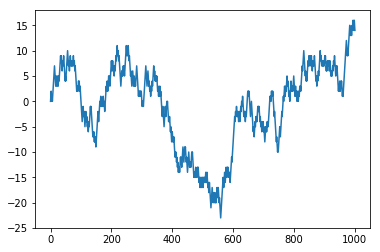

In [230]:
plt.plot(walk)

In [231]:
nsteps = 1000
draws = np.random.randint(0,2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [232]:
print(walk.min(), walk.max())

-15 26


はじめに原点から距離10に初めて到達した時刻

argmax()は全スキャンが発生することに注意

In [235]:
print(np.abs(walk) >= 10)
print((np.abs(walk) >= 10).argmax())

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

## 4.7.1 多重ランダムウォーク
ランダムウォークを5000会思考する.

In [236]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [237]:
walks

array([[  1,   0,   1, ...,  16,  15,  16],
       [ -1,  -2,  -3, ..., -12, -11, -10],
       [  1,   0,   1, ..., -32, -31, -32],
       ...,
       [  1,   2,   3, ...,  38,  39,  38],
       [  1,   2,   3, ...,  44,  43,  42],
       [  1,   0,  -1, ...,  38,  39,  40]])

In [238]:
print(walks.min(), walks.max())

-122 126


距離30に初到達時間を求める.
`any`を使用する

In [240]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True,  True, ...,  True,  True,  True])

In [241]:
hits30.sum()

3397

In [243]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

507.5151604356785

In [245]:
steps = np.random.normal(loc = 0, scale=0.25, size=(nwalks, nsteps))
steps

array([[-0.26755687,  0.23304448,  0.26950869, ...,  0.20841652,
        -0.20230443, -0.45358057],
       [-0.0094583 ,  0.32797111, -0.160129  , ...,  0.34017839,
        -0.44730078, -0.0372502 ],
       [-0.28448013, -0.13195405, -0.25321706, ..., -0.1748281 ,
         0.03763602, -0.03277826],
       ...,
       [ 0.15337903,  0.22941519, -0.69997571, ..., -0.02756437,
        -0.49580907, -0.38368892],
       [-0.23925434, -0.13861165,  0.18281269, ...,  0.0479303 ,
         0.23867634, -0.30642628],
       [-0.32013634, -0.51764194,  0.34592601, ..., -0.12294867,
         0.01415126,  0.06829186]])